# Face API Sample
face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다. 

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다.
ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [90]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다.

In [91]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302'

In [92]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [93]:
image_url = 'https://newsimg.sedaily.com/2021/04/21/22L657OAYV_1.jpg'

In [94]:
img = Image.open(BytesIO(requests.get(image_url).content))

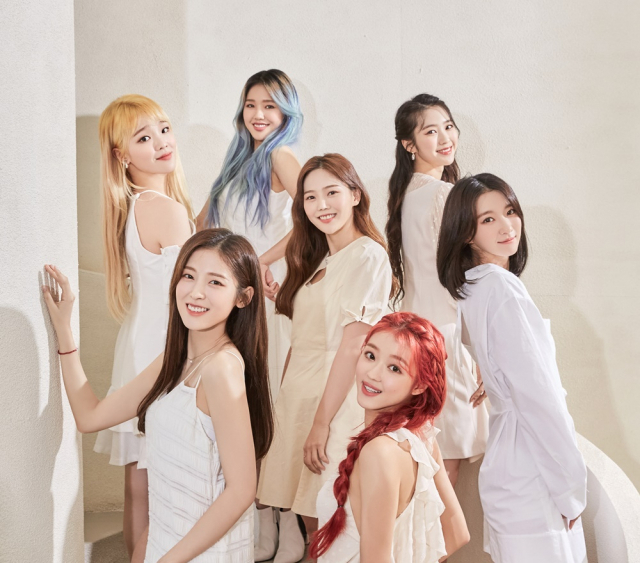

In [95]:
img

In [96]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
    'returnFaceID' : 'true',
    'returnFaceAttributes' : 'age,gender,emotion'
}

In [97]:
data = {'url' : image_url}

서비스를 호출해서 결과를 확인 합니다.

In [98]:
response = requests.post(faceDetection_url,
                        headers = headers,
                        params = params,
                        json = data)

In [99]:
faces = response.json()

In [100]:
faces

[{'faceId': 'ec012972-1688-4ff4-93f8-3fef8afdf4d0',
  'faceRectangle': {'top': 263, 'left': 170, 'width': 59, 'height': 59},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': '0a3e87cc-7388-4f45-b712-09f7ccea3bad',
  'faceRectangle': {'top': 345, 'left': 348, 'width': 59, 'height': 59},
  'faceAttributes': {'gender': 'female',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.009,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.986,
    'neutral': 0.002,
    'sadness': 0.0,
    'surprise': 0.003}}},
 {'faceId': '78bcec80-cfb7-4881-b2e0-dc881e7fb304',
  'faceRectangle': {'top': 202, 'left': 477, 'width': 52, 'height': 52},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happines

In [101]:
draw = ImageDraw.Draw(img)

In [102]:
for face in faces:
    
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left, top),(left + width, top + height)),outline='blue')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    gender = face_info['gender']
    result = 'Gender:' + gender + ' happiness:' + str(happiness * 100) +'%'
    
    draw.text((left, top),result, fill='blue')

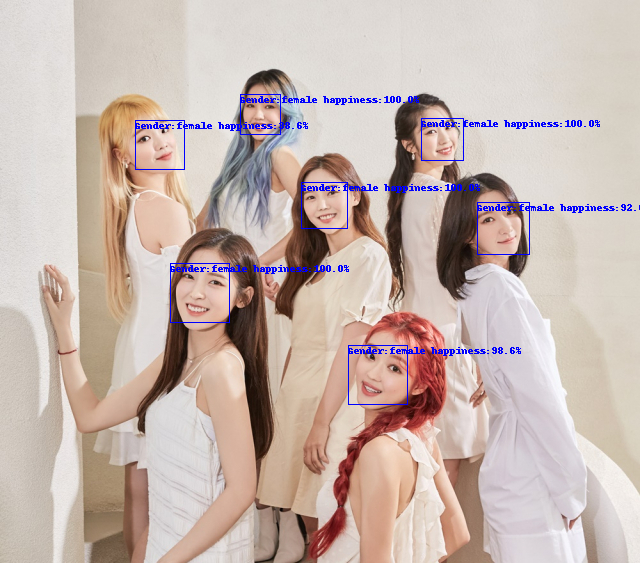

In [103]:
img